In [73]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, List, Dict, Any
import random

In [74]:
class AgentState(TypedDict):
    guesses: List[int]
    name : str
    counter: int
    targetnumber: int
    hint: str
    lower_bound: int
    upper_bound: int


In [75]:
def setup(state: AgentState) -> AgentState:
    """Setting up the game state."""

    state['guesses'] = []
    state['name'] = "John"
    state['counter'] = 0
    state['targetnumber'] = random.randint(1, 20)
    state['hint'] = ""
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    return state



In [76]:
def user_guess(state: AgentState) -> AgentState:
    """input user gueses"""
    guess = int(input(f"Hello {state['name']}, please enter your guess (between {state['lower_bound']} and {state['upper_bound']}): "))
    state['guesses'].append(guess)
    state['counter'] += 1
    return state

def check_guess(state: AgentState) -> AgentState:
    """ checks the user's guess."""
    guess = state['guesses'][-1]
    if guess < state['targetnumber']:
        state['hint'] = "Too low!"
        state['lower_bound'] = max(state['lower_bound'], guess + 1)
        print(f"Hint: {state['hint']}")
    elif guess > state['targetnumber']:
        state['hint'] = "Too high!"
        state['upper_bound'] = min(state['upper_bound'], guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state['hint'] = f"Congratulations {state['name']}! You've guessed the number {state['targetnumber']} in {state['counter']} tries."
        print(f"Success! {state['hint']}")
    return state

def should_continue(state: AgentState) -> str:
    """Looping logic"""
    guess = state['guesses'][-1]
    if guess == state["targetnumber"]:
        print(f"GAME OVER: Number found!")
        return "exit"
    if state['hint'].startswith("Congratulations"):
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "exit"
    elif state["counter"]>7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['targetnumber']}")
        return "exit"
    
    return "loop"

In [77]:
graph = StateGraph(AgentState)
graph.add_node("setup",setup)
graph.add_node("user_guess", user_guess)
graph.add_node("check_guess", check_guess)

graph.add_edge("setup", "user_guess")
graph.add_edge("user_guess", "check_guess")

graph.add_conditional_edges(
    "check_guess",
    should_continue,
    {
        "exit": END,
        "loop": "user_guess"
    },)

graph.set_entry_point("setup")
app = graph.compile()


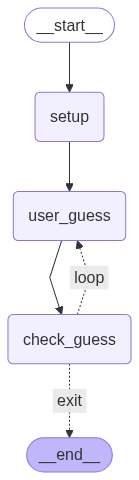

In [78]:
from IPython.display import display , Image
draw_mermaid_png = app.get_graph().draw_mermaid_png
display(Image(draw_mermaid_png())) #Display the graph as a mermaid diagram

In [79]:
initial_state_1 = AgentState(
    name="Aly",
    guesses=[],
    counter=0,
    targetnumber=random.randint(1, 20),
    hint="",
    lower_bound=1,
    upper_bound=20,

    ) #another way to invoke the graph

print(app.invoke(initial_state_1))

Hint: Too low!
Hint: Too low!
Hint: Too low!
Hint: Too low!
Hint: Too high!
Hint: Too high!
Success! Congratulations John! You've guessed the number 8 in 7 tries.
GAME OVER: Number found!
{'guesses': [2, 3, 4, 7, 10, 9, 8], 'name': 'John', 'counter': 7, 'targetnumber': 8, 'hint': "Congratulations John! You've guessed the number 8 in 7 tries.", 'lower_bound': 8, 'upper_bound': 8}
